<a href="https://colab.research.google.com/github/Rtrey29/Project1/blob/master/DS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Importing data set into a pandas dataframe

In [54]:
df = pd.read_csv('https://github.com/Rtrey29/Projects/raw/master/US_leading_cause_of_death.csv')
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


##Data cleaning & feature dropping

In [55]:
df.dtypes

Year                         int64
113 Cause Name              object
Cause Name                  object
State                       object
Deaths                       int64
Age-adjusted Death Rate    float64
dtype: object

In [56]:
# dropping 113 causename feature
df = df.drop('113 Cause Name', axis=1)
df.head()


,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,Kidney disease,Vermont,21,2.6
1,2016,Kidney disease,Vermont,30,3.7
2,2013,Kidney disease,Vermont,30,3.8
3,2000,Suicide,District of Columbia,23,3.8
4,2014,Kidney disease,Arizona,325,4.1


In [0]:
# dropping rows that have 'All Causes'
df = df[df['Cause Name'] != 'All causes']

##States Dictionary


In [0]:
states = {
        1: 'Alabama',
        2: 'Alaska',
        3: 'Arkansas',
        4: 'Arizona',
        5: 'California',
        6: 'Colorado',
        7: 'Connecticut',
        8: 'District of Columbia',
        9: 'Delaware',
        10: 'Florida',
        11: 'Georgia',
        12: 'Hawaii',
        13: 'Iowa',
        14: 'Idaho',
        15: 'Illinois',
        16: 'Indiana',
        17: 'Kansas',
        18: 'Kentucky',
        19: 'Louisiana',
        20: 'Massachusetts',
        21: 'Maryland',
        22: 'Maine',
        23: 'Michigan',
        24: 'Minnesota',
        25: 'Missouri',
        26: 'Mississippi',
        27: 'Montana',
        28: 'North Carolina',
        29: 'North Dakota',
        30: 'Nebraska',
        31: 'New Hampshire',
        32: 'New Jersey',
        33: 'New Mexico',
        34: 'Nevada',
        35: 'New York',
        36: 'Ohio',
        37: 'Oklahoma',
        38: 'Oregon',
        39: 'Pennsylvania',
        40: 'Rhode Island',
        41: 'South Carolina',
        42: 'South Dakota',
        43: 'Tennessee',
        44: 'Texas',
        45: 'Utah',
        46: 'Virginia',
        47: 'Vermont',
        48: 'Washington',
        49: 'Wisconsin',
        50: 'West Virginia',
        51: 'Wyoming'
}

##2016 all deaths for stacked bar plot

In [0]:
all16 = df[(df['Year'] == 2016) & (df['State'] != 'United States')]


In [60]:
all16

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
1,2016,Kidney disease,Vermont,30,3.7
14,2016,Suicide,District of Columbia,40,5.2
28,2016,Kidney disease,Arizona,487,5.7
70,2016,Kidney disease,Washington,532,6.6
98,2016,Influenza and pneumonia,Vermont,59,7.0
117,2016,Suicide,New Jersey,687,7.2
136,2016,Kidney disease,South Dakota,90,7.6
142,2016,Kidney disease,Oregon,398,7.7
151,2016,Influenza and pneumonia,Minnesota,529,7.8
186,2016,Suicide,New York,1679,8.1


In [61]:
pivot_all16 = all16.pivot(index='State', columns='Cause Name', values = 'Deaths')
pivot_all16

Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
State,,,,,,,,,,
Alabama,2507,3326,10419,1183,12832,987,1012,2967,788,2755
Alaska,111,238,995,124,831,61,53,196,193,439
Arizona,3082,3800,11876,2025,11957,885,487,2556,1271,4010
Arkansas,1475,2169,6612,920,8090,623,722,1643,555,1604
California,15570,13710,59515,9124,61573,5981,3640,15680,4294,13213
Colorado,1835,2575,7928,938,7277,533,491,1927,1168,2880
Connecticut,1035,1425,6696,699,7051,572,570,1269,397,1978
Delaware,329,544,2124,203,1974,132,208,506,119,516
District of Columbia,120,152,1044,127,1375,78,57,252,40,401


#Causes of death by state Bar plot

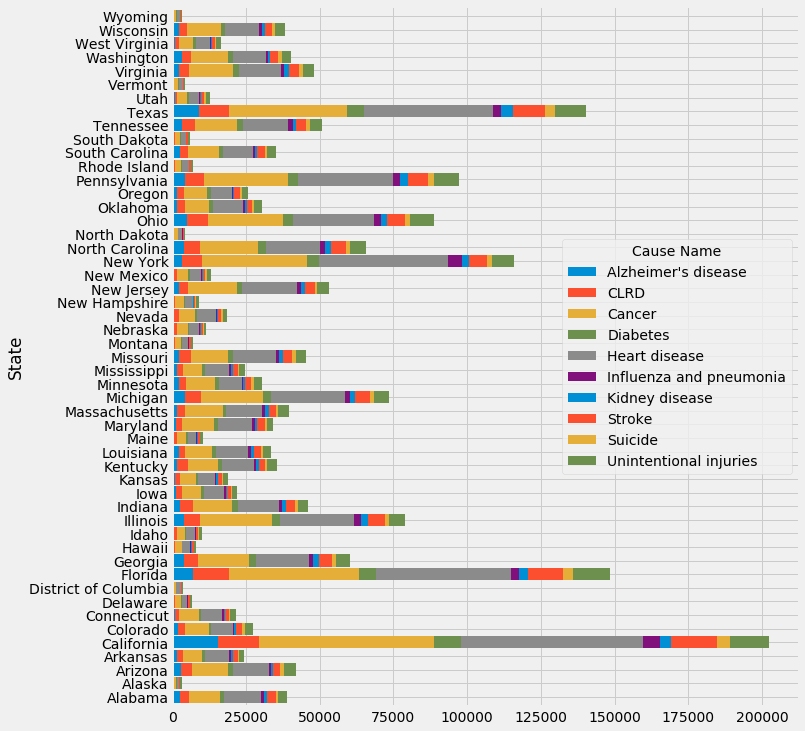

In [62]:
pivot_all16.loc[:,['Alzheimer\'s disease','CLRD', 'Cancer', 'Diabetes', 
                   'Heart disease', 'Influenza and pneumonia', 
                'Kidney disease', 'Stroke', 'Suicide', 
                   'Unintentional injuries']].plot.barh(width = .9, stacked=True, figsize=(10,12))

#Total deaths by type


In [0]:
heart16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Heart disease')]
heart_sum = heart16['Deaths'].sum()

In [0]:
alz16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Alzheimer\'s disease')]
alz_sum = alz16['Deaths'].sum()

In [0]:
clrd16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'CLRD')]
clrd_sum = clrd16['Deaths'].sum()

In [0]:
ca16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Cancer')]
ca_sum = ca16['Deaths'].sum()

In [0]:
diab16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Diabetes')]
diab_sum = diab16['Deaths'].sum()

In [0]:
ip16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Influenza and pneumonia')]
ip_sum = ip16['Deaths'].sum()

In [0]:
kidney16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Kidney disease')]
kidney_sum = kidney16['Deaths'].sum()

In [0]:
stroke16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Stroke')]
stroke_sum = stroke16['Deaths'].sum()

In [0]:
sui16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Suicide')]
sui_sum = sui16['Deaths'].sum()

In [0]:
ui16 = df[(df['Year'] == 2016) & (df['Cause Name'] == 'Unintentional injuries')]
ui_sum = ui16['Deaths'].sum()

In [73]:
dft = pd.DataFrame(columns=['Cause Name', 'Total deaths'])
dft = dft.append({'Cause Name': 'Heart disease', 'Total deaths': heart_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Alzheimer\'s disease', 'Total deaths': alz_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'CLRD', 'Total deaths': clrd_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Cancer', 'Total deaths': ca_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Diabetes', 'Total deaths': diab_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Influenza and pneumonia', 'Total deaths': ip_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Kidney disease', 'Total deaths': kidney_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Stroke', 'Total deaths': stroke_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Suicide', 'Total deaths': sui_sum}, ignore_index=True)
dft = dft.append({'Cause Name': 'Unintentional injuries', 'Total deaths': ui_sum}, ignore_index=True)

dft

,Cause Name,Total deaths
0,Heart disease,1270520
1,Alzheimer's disease,232206
2,CLRD,309192
3,Cancer,1196076
4,Diabetes,160116
5,Influenza and pneumonia,103074
6,Kidney disease,100092
7,Stroke,284284
8,Suicide,89930
9,Unintentional injuries,322748


In [74]:
df_sort= dft.sort_values('Total deaths', ascending = False)
df_sort=df_sort.reset_index(drop=True)
df_sort

,Cause Name,Total deaths
0,Heart disease,1270520
1,Cancer,1196076
2,Unintentional injuries,322748
3,CLRD,309192
4,Stroke,284284
5,Alzheimer's disease,232206
6,Diabetes,160116
7,Influenza and pneumonia,103074
8,Kidney disease,100092
9,Suicide,89930


#Total Deaths Bar plot

<Figure size 381.6x252 with 0 Axes>

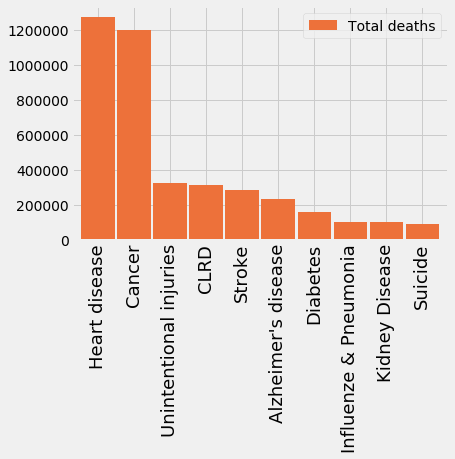

In [75]:
plt.style.use('fivethirtyeight');
fig = plt.figure(figsize=(5.3,3.5));


# plot, colors and bar width
ax = df_sort.plot.bar(color='#ED713A', width = 0.925);
x_ticks_labels = ['Heart disease', 'Cancer', 'Unintentional injuries', 'CLRD', 
          'Stroke', 'Alzheimer\'s disease', 'Diabetes', 'Influenze & Pneumonia', 
          'Kidney Disease', 'Suicide']

ax.set_xticklabels(x_ticks_labels, fontsize=18);